<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

It seems the dataset is derived from tests of various sized NACA 0012 'airfoils', which are the cross-sectional shape of a wing, blade, or sail. This dataset measures the acoustic readings from airfoils tested in an anechoic (sound-deadening) wind tunnel at various wind tunnel speeds and directions. This is useful as the acoustic readings provide a means to stress test the airfoils.

- Find out how many rows and columns are in `noise`.

In [4]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [6]:
#Based on the shape and the info below, it appears we don't have any null values
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                 1503 non-null int64
angle                     1503 non-null float64
chord_length              1503 non-null float64
free_stream_velocity      1503 non-null float64
displacement_thickness    1503 non-null float64
self_noise                1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

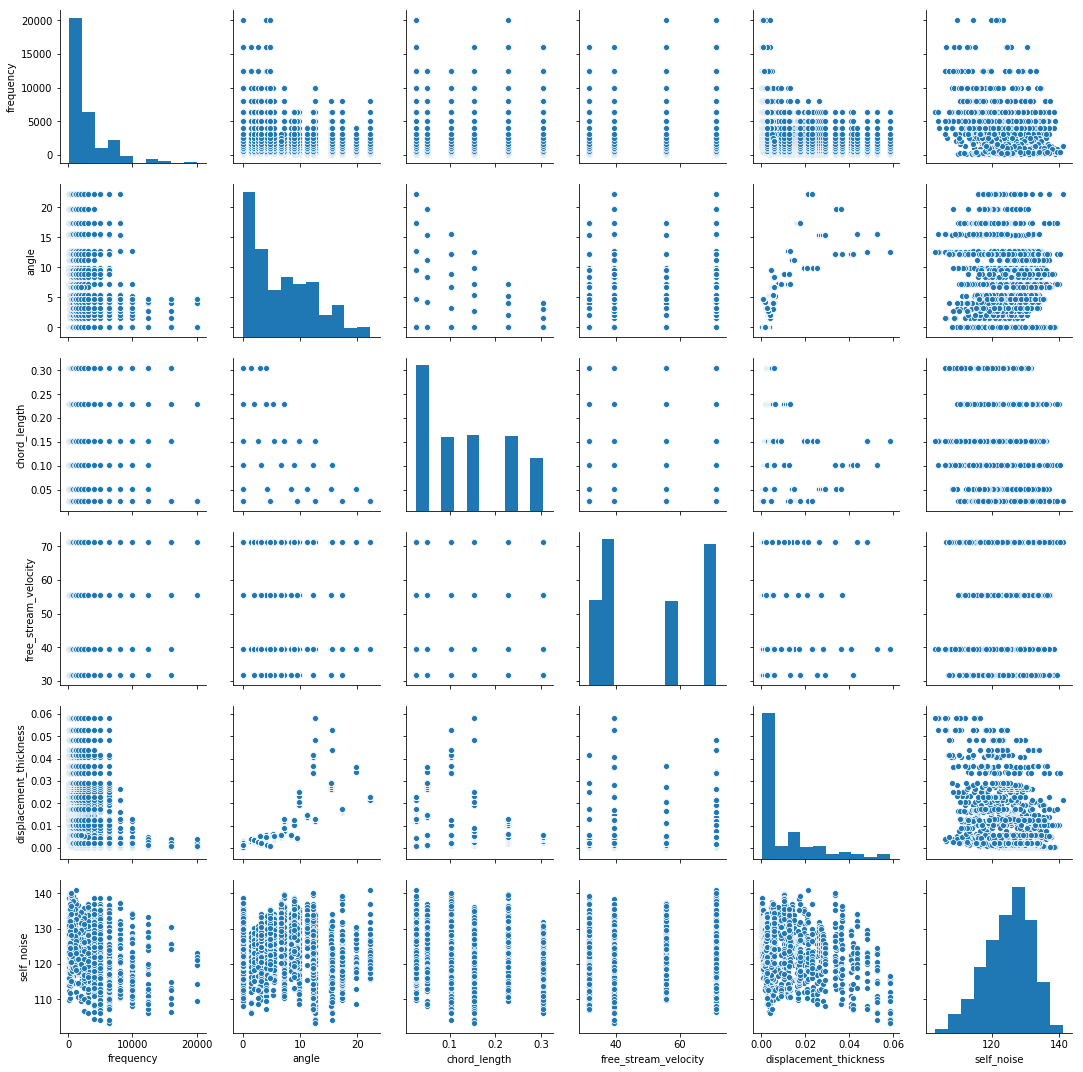

In [8]:
import seaborn as sns

g = sns.pairplot(noise)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F47718F28>,
      dtype=object)

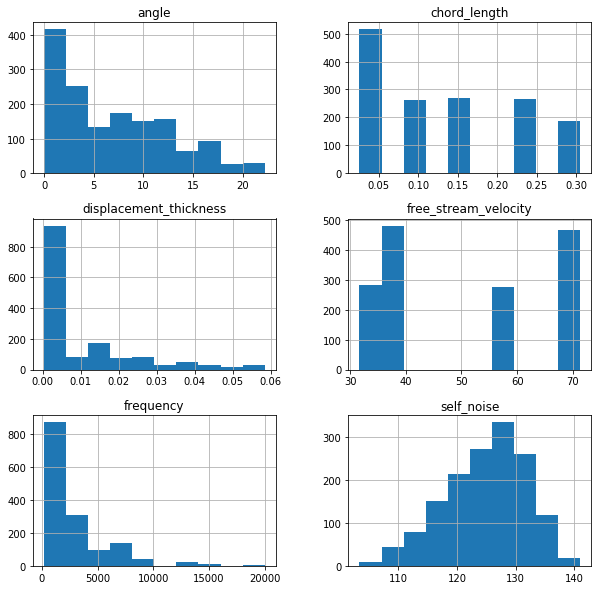

In [9]:
noise.hist(figsize=(10,10))

- Which variables are approximately normally distributed?

The only variable that seems to be normally distributed is self_noise

- Which variables show strong skew?

The strongly skewed variables appear to be angle, displacement_thickness, and frequency, all of which are right-skewed.

- Make a scatterplot of each feature variable with the target variable "self_noise".

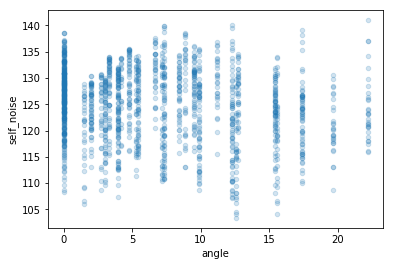

In [10]:
noise.plot(kind = 'scatter', x='angle', y='self_noise', alpha = .2)

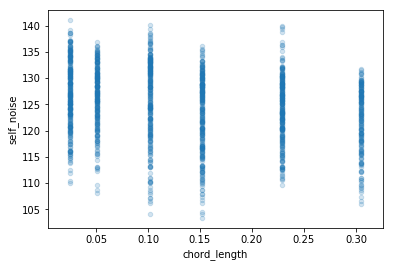

In [11]:
noise.plot(kind = 'scatter', x='chord_length', y='self_noise', alpha = .2)

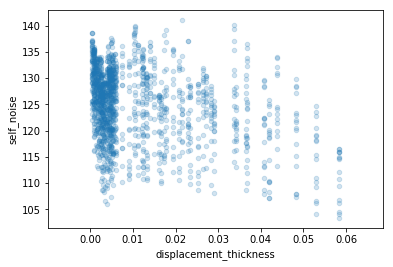

In [12]:
noise.plot(kind = 'scatter', x='displacement_thickness', y='self_noise', alpha = .2)

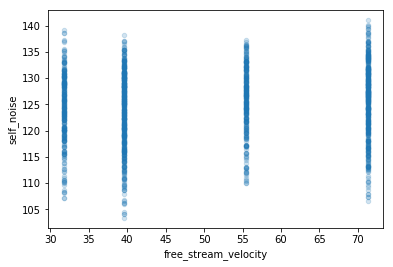

In [13]:
noise.plot(kind = 'scatter', x='free_stream_velocity', y='self_noise', alpha = .2)

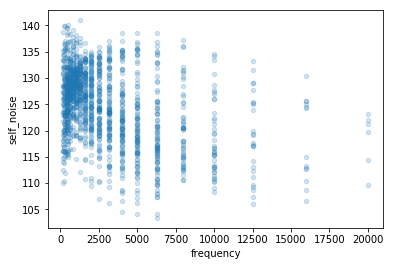

In [14]:
noise.plot(kind = 'scatter', x='frequency', y='self_noise', alpha = .2)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

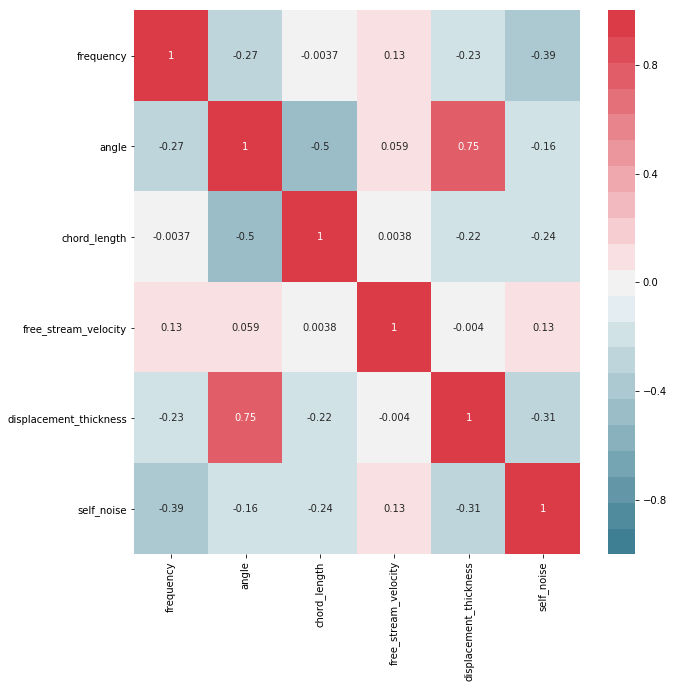

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(noise.corr(),
                vmin = -1,
                vmax = 1,
                cmap = sns.diverging_palette(220, 10, n=21),
                annot=True,
                ax=ax)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

In [ ]:
The strongest relationship seems to be between displacement_thickness and angle, however self_noise does not seem to have a very strong correlation with anything, the most significant being with frequency.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [301]:
X = noise.loc[:, ['frequency', 'angle', 'chord_length', 'free_stream_velocity', 'displacement_thickness']]
y = noise.loc[:, 'self_noise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print(y.value_counts(normalize=True).mean())

0.5378877637758719
0.4537419636493109
0.0006868131868131993


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

It seems the model can predict with about ~50 accuracy, which if our null model would be predicting the mean, would still provide a most signficant difference from our null hypothesis (being there is no relationship between the feature and target variables). It appears as though the model has very high bias.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model seems to perform slightly worse on the test set than the training set, which is to be expected. It shows us that the bias is a little higher and that we have relatively low variance. Overall, the model is performing very poorly. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model seems to have a high bias problem more than a variance problem ince it cannot derive substantial relationships between the variables. 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
rfr = RandomForestRegressor(max_depth=100)

rfr.fit(X_train, y_train)

print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

0.9575807039124584
0.9706802570051789


C:\Users\codyr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The random forest model works much better than the previous model. It seems to have low bias and low variance.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [225]:
#I am first going to try cross-validation on both models to see if we can improve our score or get a more accurate representation of model performance
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

kf = KFold(8, shuffle = True)
rfr_grid = GridSearchCV(estimator = rfr,
                        param_grid={},
                        cv = kf,
                        return_train_score = True)

rfr_grid.fit(X, y)
results = rfr_grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

[0.98598292]
[0.92478501]


In [228]:
#Our random forest model seems to be performing a little worse than before. We'll try linear regression next

kf = KFold(8, shuffle = True)
lr_grid = GridSearchCV(estimator = lr,
                        param_grid={},
                        cv = kf,
                        return_train_score = True)

lr_grid.fit(X, y)
results = lr_grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

[0.51588227]
[0.51101908]


In [ ]:
#We seem to have closed the variance of the model yet it still performs about as poorly as before.

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The dataset contains information on credit card applications with attributes given meaningless names to protect individual identities. A model for this dataset could be useful in determining what common characteristics and relationships exist for those who get approved or denied credit card applications.

In [249]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [250]:
credit.shape

(690, 16)

- Find out what data types are present.

In [251]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [252]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [282]:
credit_drop = credit[(credit != '?').all(axis=1)]
print(credit_drop.shape)
credit_drop.head()

(653, 16)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


- Find out how many null values there are in each columns.

In [283]:
#There appears to be no null values
credit_drop[credit_drop.isna()].count()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [284]:
credit_drop.describe(include = 'all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,653,653,653.000000,653,653,653,653,653.000000,653,653,653.000000,653,653,653,653.000000,653
unique,2,340,NaN,3,3,14,9,NaN,2,2,NaN,2,3,164,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,450,9,NaN,499,499,133,381,NaN,349,366,NaN,351,598,128,NaN,357
mean,NaN,NaN,4.829533,NaN,NaN,NaN,NaN,2.244296,NaN,NaN,2.502297,NaN,NaN,NaN,1013.761103,NaN
std,NaN,NaN,5.027077,NaN,NaN,NaN,NaN,3.371120,NaN,NaN,4.968497,NaN,NaN,NaN,5253.278504,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.835000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,NaN,400.000000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F649C2668>,
      dtype=object)

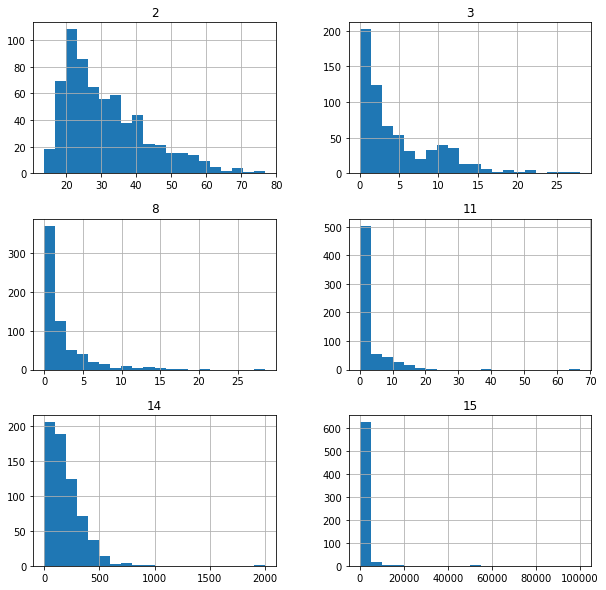

In [285]:
credit_drop[[2,3,8,11,14,15]].astype(float).hist(bins=20, figsize=(10,10))

- Which variables are approximately normally distributed?

The variable that looks most normally distributed is 2, although it still has somewhat of a right skew.

- Which variables show strong skew?

Variables 3, 8, 11, 14 and 15 all show a strong skew to the right.

- Make a scatterplot of each feature variable with the target variable (`16`).

In [ ]:
#I am getting every error known to man trying to make scatter plots with these variables so I am trying to 16 a dummy variable

In [293]:
#Still getting errors

credit_drop[[2,3,8,11,14,15]].astype(float).plot(kind='scatter', x=credit_drop[2], y=credit_drop[16], figsize=(10,10))

KeyError: "None of [Index(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17', '22.92',\n       '54.42', '42.50',\n       ...\n       '19.50', '27.83', '17.08', '36.42', '40.58', '21.08', '22.67', '25.25',\n       '17.92', '35.00'],\n      dtype='object', length=653)] are in the [columns]"

In [286]:
#Let's try dummy variables
dummies = pd.get_dummies(credit_drop, columns=[16], drop_first=True)
print(dummies.shape)
dummies.head()

(653, 16)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16_-
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


In [298]:
#Still more errors.
dummies.plot(kind='scatter', x=credit_drop[2].astype('float'), y='16_-')

KeyError: "None of [Float64Index([30.83, 58.67,  24.5, 27.83, 20.17, 32.08, 33.17, 22.92, 54.42,\n               42.5,\n              ...\n               19.5, 27.83, 17.08, 36.42, 40.58, 21.08, 22.67, 25.25, 17.92,\n               35.0],\n             dtype='float64', length=653)] are in the [columns]"

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

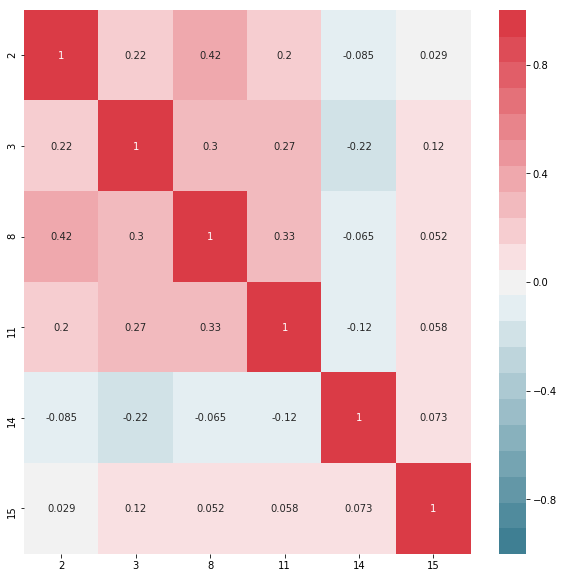

In [175]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(credit_drop[[2,3,8,11,14,15]].astype(float).corr(),
                vmin = -1,
                vmax = 1,
                cmap = sns.diverging_palette(220, 10, n=21),
                annot=True,
                ax=ax)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Most of the variables have low correlation to each other, so I would likely not priotize one over another and instead attempt to examine them collectively.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [299]:
credit_drop[16].value_counts(normalize=True)

-    0.546708
+    0.453292
Name: 16, dtype: float64

The accuracy of a null model predicting '-', which is the most common outcome, would be about 55%.

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [184]:
dummies = pd.get_dummies(credit_drop, columns=[1,4,5,6,7,9,10,12,13,16], drop_first=True)
print(dummies.shape)
dummies.head()

(653, 38)


,2,3,8,11,14,15,1_b,4_u,4_y,5_gg,...,7_n,7_o,7_v,7_z,9_t,10_t,12_t,13_p,13_s,16_-
0,30.83,0.000,1.25,1,00202,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6,00043,560,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0,00280,824,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5,00100,3,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0,00120,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [229]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

X = dummies.drop('16_-', axis = 'columns')
y = dummies['16_-']

#Making sure we split the data correctly
print(y.head())
X.head()

0    0
1    0
2    0
3    0
4    0
Name: 16_-, dtype: uint8


,2,3,8,11,14,15,1_b,4_u,4_y,5_gg,...,7_j,7_n,7_o,7_v,7_z,9_t,10_t,12_t,13_p,13_s
0,30.83,0.000,1.25,1,00202,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6,00043,560,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0,00280,824,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5,00100,3,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0,00120,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

log_reg.fit(X_train, y_train)

print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))
y.value_counts(normalize=True)

0.87527352297593
0.8622448979591837


C:\Users\codyr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1    0.546708
0    0.453292
Name: 16_-, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model is slightly overfitted as it performed better on the training set than the test set, which tells us the bias is lower and variance is higher.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model appears to have more of a variance problem as it performance of the test set is less than the training set.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [213]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 100)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9978118161925602
0.8316326530612245


C:\Users\codyr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The bias seems to be lower on this model than the previous and the variance much higher. It's predictive ability is about the same as the previous model, though.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [230]:
#We will try KFold again to see if it improves our random forest model
kf = KFold(8, shuffle = True)
rfc_grid = GridSearchCV(estimator = rfc,
                        param_grid={},
                        cv = kf,
                        return_train_score = True)

rfc_grid.fit(X, y)
results = rfc_grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

[0.99081058]
[0.86523737]


- **BONUS:** Keep going! Find ways to make your model better.